<a href="https://colab.research.google.com/github/selimunal/tensorflow/blob/main/LSTM_NonLInear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd

from tensorflow.keras.layers import Input,Dense,Flatten, SimpleRNN, GRU, LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD

In [ ]:
import matplotlib.pylab as plt

In [ ]:
series=np.sin((0.1*np.arange(400))**2)
len(series)

400

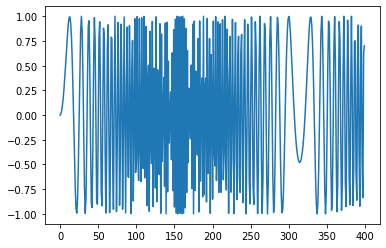

In [ ]:
plt.plot(series)
plt.show()

In [ ]:
#BUILD SUPERVISED DATA no need to change for RNN
T=10
D=1
X=[]
Y=[]

In [ ]:
for t in range(len(series)-T):
  x=series[t:t+T]
  X.append(x)
  y=series[t+T]
  Y.append(y)

In [ ]:
X=np.array(X).reshape(-1,T) #NxT array
Y=np.array(Y)
N=len(Y)
X.shape, Y.shape

((390, 10), (390,))

In [ ]:
#TRYING AUTO REGRESSIVE MODEL
i=Input(shape=(T,1))
x=Dense(1)(i)
model=Model(i,x)
model.compile(
    loss="mse",
    optimizer=Adam(lr=0.01),
)

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
#TRAIN THE RNN
r=model.fit(
    X[:-N//2], Y[:N//2],
    epochs=80,
    validation_data=(X[-N//2:],Y[-N//2:]),
)

In [ ]:
r.history.keys()

dict_keys(['loss', 'val_loss'])

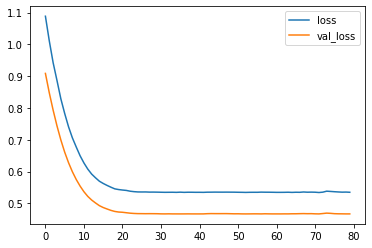

In [ ]:
plt.plot(r.history["loss"],label="loss")
plt.plot(r.history["val_loss"],label="val_loss")
plt.legend()

In [ ]:
#one-step forecast using true targers
#this is a shortcut
outputs=model.predict(X)
outputs.shape

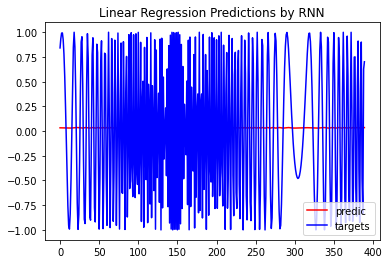

In [ ]:
predictions=outputs[:,0]
plt.plot(predictions, label="predic",color="r")
plt.plot(Y,label="targets",color="b")
plt.title("Linear Regression Predictions by RNN")
plt.legend()

In [ ]:
#previous one step forecast to compare
validation_target=Y[-N//2:]
validation_pred=[]
#first validation input
i=-N//2

while len(validation_pred)<len(validation_target):
  p=model.predict(X[i].reshape(1,-1))[0,0]
  i+=1

  #updata
  validation_pred.append(p)

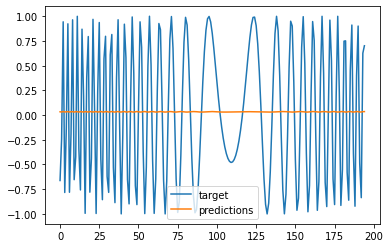

In [ ]:
plt.plot(validation_target,label="target")
plt.plot(validation_pred,label="predictions")
plt.legend()

In [ ]:
#MULti step forecast
validation_target=Y[-N//2:]
validation_predictions=[]

#last train input
last_x=X[-N//2]

while len(validation_pred)<len(validation_target):
  p=model.predict(last_x.reshape(1,-1))[0,0]

  validation_predictions.append(p)

  last_x=np.roll(last_x,-1)
  last_x[-1]=p

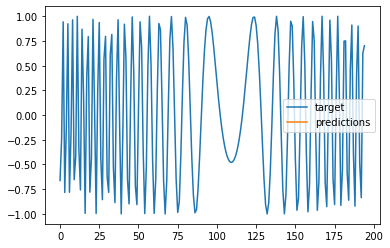

In [ ]:
plt.plot(validation_target,label="target")
plt.plot(validation_predictions,label="predictions")
plt.legend()

## LSTM *MODEL*

In [ ]:
#LSTM MODEL
X=X.reshape(-1,T,1) # NxTxD dimensions

In [ ]:
#MAKE RNN
i=Input(shape=(T,D))
x=SimpleRNN(10)(i)
x=Dense(1)(x)
model=Model(i,x)
model.compile(
    loss="mse",
    optimizer=Adam(lr=0.05),
)

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
#train the RNN
r=model.fit(
    X[:-N//2],Y[:-N//2],
    batch_size=32,
    epochs=200,
    validation_data=(X[-N//2:],Y[-N//2:]),
)

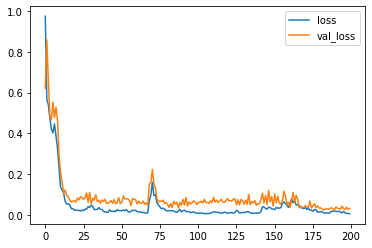

In [ ]:
plt.plot(r.history["loss"],label="loss")
plt.plot(r.history["val_loss"],label="val_loss")
plt.legend()

In [ ]:
#ONE step forecast
outputs=model.predict(X)
outputs.shape

predictions=outputs[:,0]

13/13 [==============================] - 0s 4ms/step


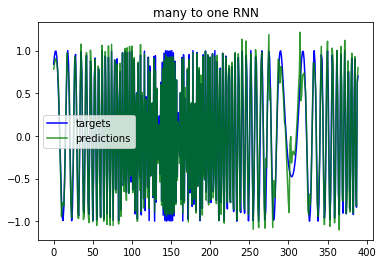

In [ ]:
plt.plot(Y,label="targets",color="b")
plt.plot(predictions,label="predictions",color="g",alpha=0.8)
plt.title("many to one RNN")
plt.legend()

Good model now

In [ ]:
#Multi step forecast
forecast=[]
input_=X[-N//2]
while len(forecast)<len(Y[-N//2:]):
  #reshape input to N T D
  f=model.predict(input_.reshape(1,T,1))[0,0]
  forecast.append(f)

  input_=np.roll(input_,-1)

  input_[-1]=f

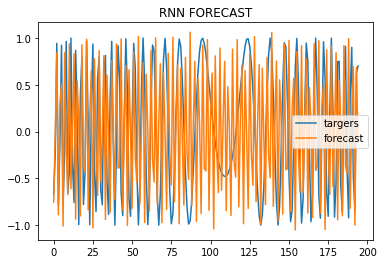

In [ ]:
plt.plot(Y[-N//2:],label="targers")
plt.plot(forecast,label="forecast")
plt.title("RNN FORECAST")
plt.legend()

Somewhat okay, RUN this with LSTM 

In [ ]:
X.reshape(-1,T,1) #making N T D

i=Input(shape=(T,D))
x=LSTM(10)(i)
x=Dense(1)(x)
model=Model(i,x)
model.compile(
    loss="mse",
    optimizer=Adam(lr=0.05),
)

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
r=model.fit(
    X[:-N//2],Y[:-N//2],
    batch_size=32,
    epochs=200,
    validation_data=(X[-N//2:],Y[-N//2:]),
)

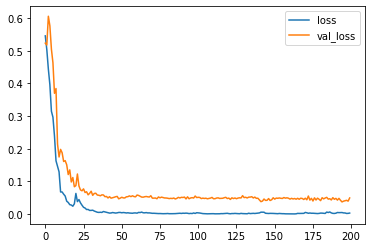

In [ ]:
plt.plot(r.history["loss"],label="loss")
plt.plot(r.history["val_loss"],label="val_loss")
plt.legend()

In [ ]:
#one step forecast
outputs=model.predict(X)
outputs.shape

13/13 [==============================] - 1s 5ms/step


(390, 1)

In [ ]:
predictions=outputs[:,0]

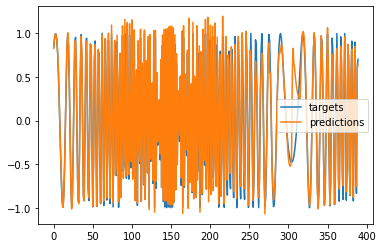

In [ ]:
plt.plot(Y,label="targets")
plt.plot(predictions,label="predictions")
plt.legend()

Little better now, check multi step forecast

In [ ]:
forecast=[]
input_=X[-N//2]
while len(forecast)<len(Y[-N//2:]):

  f=model.predict(input_.reshape(1,T,1))[0,0]
  forecast.append(f)

  input_=np.roll(input_,-1)
  input_[-1]=f

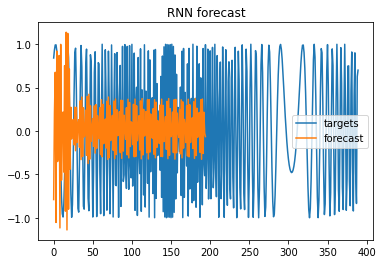

In [ ]:
plt.plot(Y,label="targets")
plt.plot(forecast,label="forecast")
plt.title("RNN forecast")
plt.legend()

Similar to SImple RNN
LSTM is better than RNN not better than everything. There is a point where LSTM forget.
Avoid generalization. 
THis data doesnt have long term dependencies. Not real advantage using LSTM for this problem